In [2]:
# libraries
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox

from PIL import ImageTk, Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from keras.utils.np_utils import to_categorical 
from keras.models import load_model
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("data\HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


#### Note:
Dataframein(**df**) içerisinde **dx** feature(column)'unu countplot yapılıyor. Yani içerisinde bulunan kanser hücresinden kaç tane olduğunu ve dağılımını grafikle bize gösteriyor.
- **%matplotlib qt** eklentisinin düzgün çalışması(değerlerin doğru görüntülenebilmesi) için figure'un tam ekran yapılması gerekmektedir!

<AxesSubplot:xlabel='dx', ylabel='count'>

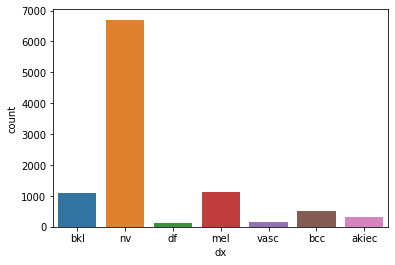

In [5]:
# %matplotlib qt5 
# %matplotlib widget # embedded
sns.countplot(x = "dx", data = df)

## 1-Data Preprocessing

- Öncelikle image'lerin dosya konumları(path) dataFrame'e path adıyla sütun olarak eklenir.

In [6]:
img_folder_name = 'img/'
extension = ".jpg"
#sample image path = img_folder_name + image_id[i] + extension
# ismi path olan, dosya yoluna eşit değerleri olan yeni column oluşturulur.
df['path'] = [ img_folder_name + i + extension for i in df['image_id'] ]
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,img/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,img/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,img/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,img/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,img/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,img/ISIC_0032854.jpg


- df['path']'in içerisindeki her bir satırı fonksiyon yapması için map kullanılır. 
- x = 'path' e karşılık gelir. 
- x pathindeki resmi aç diyoruz. 
- Ancak bu resmi biz array olarak tanımlamak ve tutmakistiyoruz, bu yüzden np.asarray cast'ı ekleriz.

- Bu işlem birkaç dakika süreceği için aşağıda ```df.to_pickle("df.pkl")``` işlemini yaparak, verilerin son halini df.pkl dosyasında tutmuş oluruz.

In [7]:
df["image"] = df["path"].map( lambda x: np.asarray(Image.open(x).resize((100,75))))

In [8]:
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,img/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,img/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


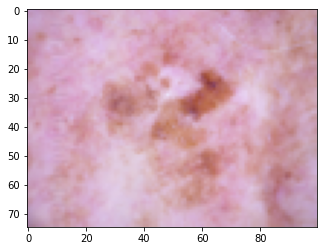

In [9]:
# %matplotlib inline
plt.imshow(df["image"][0]) # imshow: bir matrisi image şeklinde gösterir.

In [10]:
# string değerleri numeric değerlere kodlar(convert).
df["dx_idx"] = pd.Categorical(df["dx"]).codes

In [11]:
df.head(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,dx_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",2


In [12]:
df.to_pickle("df.pkl") # Yukarıda yaptığımız işlemleri her seferinde yapmak zahmetli. Verimizi convert edeceğimiz, verimizi depolayan bir pickle dosyası olduğunu bilmek yeterli.

## 2-Read Pickle File

In [ ]:
df = pd.read_pickle("df.pkl") # verilerimizi hızlıca yukarıdaki adımları yapmaya gerek kalmadan bu bloku debug ederiz, dataFrame nesnesine dönüştürürek.
df.head(3)

## 3-Standardization

- df['image'] sütununu yazdırdığımızda indeksleriyle birlikte bir array görünümlü ama indeksi de olan bir tür olarak görülecektir. Bu yüzden ilk önce list sonrasında da array'e çevirerek tüm indekslerden kurtulmuş oluruz. 

- **x_train** burada bizim eğitilecek verilerimiz image dosyalarıdır. Bu image dosyaları üzerinde algoritmalar ve modeller uygulanacaktır. Ve daha sonra elimizde olan görüntüler bu x_train verileriyle karşılaştırılacaktır.
- **x_test** görürsek bunun anlamı, eğitilmiş x_train verilerimizle, bunlardan ayrı hiç eğitilmemiş **yeni verilerimizi**, **x_train** verilerimize göre karşılaştırılacak ve yeni verilerimizin **target class** dediğimiz kanser türü (dx) sonuçları oluşturulacak.

In [ ]:
x_train = np.asarray(df["image"].tolist())

In [ ]:
#  stardardization
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train = (x_train - x_train_mean)/x_train_std

- **y_train** bizim target classlarımızdır. Yani outputumuz olan kanser hücresi türüdür. 
- Bu veri image dosyalarının olduğu verilerden(**x_train**) ayrı hesaplanacağı için ayrı tutulur.

- Aşağıda **One Hot Encoding** yöntemi kullanılmıştır. Bu yöntemdeki mantık:
**dx_idx** sütunu içerisinde 7 farklı sonuca(kanser hücresi türüne) karşılık gelen sayı vardır, bunlar: 0, 1, 2, 3, 4, 5, 6
- **One Hot Encoding** yöntemiyle:
> <br>
> 0 yerine 0000000 => herbiri 7 adet rakamdan oluşur. (num_classes = 7)<br> 
> 1 yerine 0100000 <br>
> 2 yerine 0010000 <br>
> 3 yerine 0001000 <br>
> 4 yerine 0000100 <br>
> 5 yerine 0000010 <br>
> 6 yerine 0000001 yazılır.<br><br> 

In [ ]:
# one hot encoding
target_class_count = len(pd.unique(df['dx_idx']))
y_train = to_categorical(df["dx_idx"], num_classes = target_class_count)

In [ ]:
print("x_train: " , x_train.shape)
print("y_train: " , y_train.shape)

# 4- Building the Model => Bir Deep Learning Algoritması: CNN

In [ ]:
x_train.shape # 10015 instance, 75x100, 3 (RGB color image)
n_row = x_train.shape[1]
n_col = x_train.shape[2]
col_type = x_train.shape[3]
print(n_row, n_col, col_type)

In [ ]:
input_shape = (n_row, n_col, col_type)
target_class_count

In [ ]:
model = Sequential() # Sırayla tüm CNN layerlerımızı adım adım eklememiz için gerekli.

## LAYER 1: Convolutional Layer
> <br>
> Resmin özelliklerini saptamak için kullanılır.
> <br> <br>
- Bu katman CNN’nin ana yapı taşıdır. 
- Resmin özelliklerini algılamaktan sorumludur. 
- Bu katman, görüntüdeki düşük ve yüksek seviyeli özellikleri çıkarmak için resme bazı fitreler uygular. 
- Örneğin, bu filtre kenarları algılayacak bir filtre olabilir. Bu filtreler genellikle çok boyutludur ve piksel değerleri içerirler.
- (5x5x3) özelliğinde bir matris için 5 matrisin yükseklik ve genişliğini, 3 matrisin derinliğini temsil eder.

```python
Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "Same", input_shape = input_shape)
```
kodunu inceleyecek olursak,
- 32:neron sayısı, 
- kernel_size = (3,3): convolutional filtre boyutu 3x3 matris, 

- activation = "relu": Bu bir ReLu activation function'udur. Genellikle CNN de kullanılır. Ana avantajı aynı anda tüm nöronları aktive etmemesidir. Yani bir nöron negatif değer üretirse, aktive edilmeyeceği anlamına gelir. Negatif değerler üreten nöronlar sıfır değerini alır. Bu durum, **ReLU**’nun Hiperbolik Tanjant ve Sigmoid fonksiyonundan daha verimli ve hızlı çalışmasını sağlar. Bu nedenle ReLU, çok katmanlı sinir ağlarında daha çok tercih edilir. 

- padding = "Same": Veri kaybını önlemek için
- input_shape = input_shape: verinin boyutu ve rgb özelliği olması.

#### Özetle
1. **Convolution input** resmin(matrisin) üzerinde **convolutional filter**’ın kaydırılması sonucu yapılır. 

2. Çakışan sayılar çarpılır. 
3. Çarpım sonucu elde edilen sayılar toplanarak **feature map** (output) matrisine aktarılır. 
4. Bu işlem input resminin boyutunu düşürürken veri kaybına da sebep oluyor. Veri kaybını önlemek için **same padding** metodu kullanılıyor. **Same padding** input resminin etrafına sıfır değerlerinden oluşan bir **çerçeve** eklenmesine deniyor. Bu sayede veri kaybı önleniyor. 
5. **Feature map** resme ait bir **feature** tutar, örneğin input arabaysa, bir feature map arabanın farını tutabilir, fakat arabanın diğer tüm özellikleri yani kapısı, camı vs gibi tüm feature’ları tespit edebilmek için çok sayıda **feature map**’e ihtiyaç duyarız. 
6. **Convolution** işleminin ardından feature map’e bir **aktivasyon fonksiyonu** olan **reLu** uygulanır. İşlemin **reLu** fonksiyonuna sokulmasının sebebi eksi değerlerin(nöronların) sıfırlanmasıdır. 
7. İkinci kez bu **Convolutional Layer**'ı tekrar ekleriz. Bunun sebebi tecrübelere dayalıdır. Ancak esas sebep: İlk filtreyi uyguladığımızda, bir **Feature Map** oluşturuyor ve bir **özellik** türünü tespit ediyoruz. Ardından, ikinci bir filtre kullanıp başka bir **özellik** türünü algılayan ikinci bir **Feature Map** oluştururuz.
8. İkinci kez CNL uygularken, input_shape yazmıyorum. Çünkü modelimi Sequential() bir yapıda kurdum. Sequential(feature1, feature2) => yani ilk baştaki işlemin sonucunda oluşan feature_map, artık 2. işlemin inputu olacak. Ancak ilk baştakinin inputunu mecbur belirtmem gerekir, 2. işlem gibi şanslı değil.

In [ ]:
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "Same", input_shape = input_shape))
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "Same"))

## LAYER 2: Pooling Layer
1. Bu katman, CovNet’teki ardışık **convolutional katmanları** arasına sıklıkla eklenen bir katmandır.

2. Bu katmanın görevi, gösterimin kayma boyutunu ve network içindeki parametreleri ve hesaplama sayısını azaltmak içindir. Bu sayede ağdaki uyumsuzluk kontrol edilmiş olur. Bunun dışında **overfitting** (aşırı öğrenme) sorununu çözmek için de kullanılır.
3. Birçok Pooling işlemleri vardır, fakat en popüleri **max pooling**’dir. 
4. Yine aynı prensipte çalışan **average pooling**, ve **L2-norm pooling** algoritmaları da vardır.
5. Feature map matrisi üzerinde belirlenen ölçülerde bir pencere dolaştırılır. Pencere içerisinde ki max değerin alınmasıyla yapılan bir işlemdir. Bu sayede, sinir ağının doğru karar vermesi için için yeterli bilgiyi içeren daha küçük çıktıları kullanmış olur.

In [ ]:
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
model.add(Dropout(0.25)) # overfitting'i önlemek için dropout ekleriz.

## LAYER 3: Tekrardan, Yine => Convolutional Layer
- Nöron sayısını bu sefer 32 değil de 64 yaptık.

In [ ]:
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", padding = "Same", input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", padding = "Same"))

## LAYER 4: Tekrardan Pooling Layer


In [ ]:
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5)) # overfitting'i önlemek için dropout ekleriz.

 ## Layer 5: Flattening Layer
 1. Genel olarak, sinir ağları(neural network), input verilerini tek boyutlu bir diziden alır.
 
 2. **Convolution** ve **Pooling** işlemlerinden sonra ortaya çıkan matrisleri **n satır 1 sütundan** oluşan vektörlere dönüştürme işlemine **flattening** denmektedir. Örneğin: 2x2 => 4x1 ya da 3x3 => 9x1
 3. Bu vektörler, son ve en önemli katman olan  **artificial neural network**’ün olduğu kısım olan **Fully Connected Layer**ın inputları olacaktır.

In [ ]:
 model.add(Flatten())

 ## Layer 6: Full Connected/Dense Layer
- Girdi resmimizi sinir ağları ile eğitebileceğimiz kıvama getirildikten sonra (Yani matris halinde olan görselimiz düz bir vektör haline getirildikten sonra) geriye sadece klasik sinir ağlarındaki çalışma mantığı kalıyor. 

- Yine katmanlardaki nodelarda (düğüm) özellikler tutuluyor ve weight (ağırlık) ve bias değiştirilerek öğrenme sürecine giriliyor.

In [ ]:
model.add(Dense(128,activation="relu")) # nöron sayısı ne kadar fazla olurs o kadar iyi ancak veri kapasitesi artacak.
model.add(Dropout(0.5)) # overfitting'i önlemek için dropout ekleriz.

 ## Layer 7: Output Layer
- Output layer yine dense olacak(ANN).

- Dikkat edilmesi nokta, outputta 7 farklı sonuçtan 1 tanesinin çıkabilmesi için burada **nöron sayısı** yerine **target class** sayısını gireriz.
- Activation fonksiyonu olarak da **reLu** yerine **softmax** kullanılacaktır.
- **Softmax** activasyonu **Target Class** sayısı **2**'den fazla ise kullanılan bir yöntemdir. (Bizim veri setinde **7 target class** var.)
- Bu işlem sonucunda şu şekilde bir output dizisi ortaya çıkar:
0.1 - 0.2 - 0.3 - 0.05 - 0.25 - 0.02 - 0.08
- Yukarıdaki 7 tane elemanı olan target sınıfında en büyük değer 0.3'tür. Yani Yüzde 30 olasılığıyla sonuç 3. sıradaki classtır diyebiliriz.

In [ ]:
model.add(Dense(target_class_count, activation="softmax"))
model.summary() # özetleyeceğimiz kısım.

## 5-Compiling the Model

- Modelin derlenmesi **model.compile()** fonksiyonu ile yapılır. 

- Bu fonksiyon **optimizer**, **loss**(kayıp)  ve **metrics** (metrik) olmak üzere üç temel parametre alır. Farklı parametreler de kullanılabilir.
1. **Optimizer**, öğrenme oranını(**learning rate**) kontrol eder. Optimizer olarak **“**Adam** kullanıyoruz. **Adam** genellikle birçok durumda kullanmak için iyi bir **optimizasyon** algoritmasıdır. **Adam** algoritması, training boyunca **learning rate**'i ayarlar.

2. **Learning Rate** (Öğrenme oranı), model için optimal ağırlıkların ne kadar hızlı hesaplandığını belirler. Daha küçük bir **learning rate**, daha kesin ve iyi ağırlıklara (belirli bir noktaya kadar) yol açabilir, bu modelin daha **iyi** öğrenmesi anlamına gelir ancak ağırlıkların hesaplanması için gereken süre daha **uzun** olacağından dolayı eğitim(train) süresi uzayacaktır.
3. **Loss** fonksiyonumu,training aşamasında giderek azalmasını bekleriz. Bu fonksiyon için **categorical_crossentropy** kullanacağız. Bu, sınıflandırma problemleri için en yaygın kullanılan fonksiyon türüdür.
4. **Accuracy** de loss ile ters orantılı olarak artmalıdır. Bu model tahminleri doğru yapabiliyor anlamına gelir.
5. Eğitim(Train) sırasında modelin nasıl bir performans gösterdiğini yorumlamak için her bir **epoch** sonunda **validation(test)** seti ile elde edilen **doğruluk** ve **loss** miktarını görmek için **accuracy** metriğini kullanırız.


In [ ]:
optimizer = Adam(learning_rate = 0.0001) # The 'lr' argument is deprecated, so we use learnign_rate.
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

## 6-Training the Model

1. **fit** fonksiyonu içerisine (**validation_data**=(X_test, y_test)) da yazılırdı. Bu projede test işlemi yapılmadığı için eklenmedi.

2. **Batch Size**: Batch sayısı modelin eğitilmesi aşamasında aynı anda kaç adet verinin işleneceği anlamına gelir. Ne kadar fazla yapılırsa RAM'e o kadar yük biner, ama işlem daha kısa sürer! :) Bu sayı genellikle 2'nin üssü olması yani 2,4,8,16,32 gibi sayıların olması tavsiye edilir.
3. **Epoch**: 
- verilerin kaç kez **train** edeceğini söyler. Mesela 10000 adet resmimiz var. Epoch 2 ise tüm 10000 resim 2 kez train edilecektir.

- bu değerin küçük bir sayı olması, eğitim süresini kısa tutarken modelin performansı tam gelişmemiş olabilirken, büyük bir sayı olması ise eğitim süresi çok uzun olur ve model gelişimini çoktan tamamlamış olabilir. Yani gereksiz eğitim yapılmış olabilir optimumm noktayı bulmakta zorlanabiliriz
- Bunun için en iyi yöntem **büyük bir sayı** belirlenmesi ve modelin gelişimini tamamladığı noktada eğitimi durdurmaktır, buna **early stopping** deniyor. 
- Bu yöntem bu projede kullanılmadı ancak bu yöntem araştırılacak.
- Accuracy değeri her epoch değerinde artıyor. Bu değerin durduğu epoch değerini gözlemek gerekir.
4. **Shuffle**: Her **Epoch**ta, verilerin yerlerinin değiştirilmesidir. Eğitimin daha doğru olması için kullanılır. True ve False boolean değerleri alır.

5. **Verbose**: 0, 1 ve 2 değerlerinden birisini alır. 
- 0 değeri, eğitim sırasında ekranda bir sonuç göstermezken, 
- 1 değeri, **progres bar** gibi anlık olarak güncellenen sonçları gösterir. 
- 2 değeri ise her bir epoch sonunda tek bir satır olarak çıktı verir.

In [ ]:
history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = 64, 
                    epochs = 50,
                    verbose = 1,
                    shuffle = True)

### Note
##### Modelin performansını arttırmak için modelin ayarları ile oynamak, daha fazla katman veya nöron eklemek, verileri çoğaltmak veya daha güzel veriler seçmek gerekebilir.

- Modeli train etme işlemi epoch değerine ve learning rate değerlerine göre uzun sürede gerçekleşebilir.

- Bu yüzden mevcut modeli kaybetmek istemeyiz ve modeli bir yerde **my_model1.h5** adıyla kaydedebiliriz. 
- Özetle modelde learning rate ve epoch değerleriyle oynayarak yeni isimler verilebilir ve sonuçlar karşılaştırılabilir. Farklı seçenekleri kullanıcı arayüzünde gösterilecek Model1 veya Model2 diye.

In [ ]:
#model.save("my_model1.h5") # yanlışlıkla debug etmemek için comment içerisine aldık.
#model.save("my_model2.h5")

In [ ]:
# load models
model1 = load_model("my_model1.h5")
model2 = load_model("my_model2.h5")

## 7-Using our models to make predictions (Yeni veriler ile tahmin yapmak)

- Modellerimizi yeni verilerle ilgili tahminlerde bulunmak için kullanmak istiyorsak, **model.predict()** fonksiyonunu kullanmamız gerekir. 

- Input olarak **test** verilerinden istediğimiz bir tanesini seçip verebiliriz.

- Ben **5. satırda** bulunan veriyi alıp **tahminde** bulunmasını istedim. 

- Sonuç olarak %60 oranında meningioma tümörü çıktı. Modelin başarı oranına göre gayet başarılı bir sonuş olduğunu söyeyebiliriz.

In [ ]:
index = 0
y_train[index] # 10. indexin gerçekteki değeri, şimdi aşağıda tahminleme yapalım.
df.head(5)

In [ ]:
y_pred = model2.predict(x_train[index].reshape(1,75,100,3))
print(y_pred)
print("Maximum value: ",np.max(y_pred)) # Tüm olasılıkların toplamının 1 olmasını bekleriz.
print("Sum: ", np.sum(y_pred)) # Tüm olasılıkların toplamının 1 olmasını bekleriz.

In [ ]:
reel_index = np.argmax(y_train[index])
predict_index = np.argmax(y_pred)
print("Predict result:", predict_index)
print("Reel result:", np.argmax(y_train[index]))

# predicted_cancer = list(df.dx.unique())[predict_index] #output
# reel_cancer = list(df.dx.unique())[reel_index]

# print("predicted cancer: ", predicted_cancer)
# print("reel cancer: ", predicted_cancer)

reel_filter = df["dx_idx"]==reel_index
reel_cancer=df["dx"][reel_filter].unique()
print("Reel cancer: ", reel_cancer[0])

predict_filter = df["dx_idx"]==predict_index
predicted_cancer=df["dx"][predict_filter].unique()
print("Predict cancer: ", predicted_cancer[0])

# Skin Cancer Classification GUI

Kullanıcı arayüzünde,

- 1 tane parent window => **window**

- **window**'a bağlı 2 tane main frame => **frame_left** ve **frame_right**,
- **frame_left**'e bağlı 2 tane sub frame => **f1** ve **f2**
- **frame_right**'a bağlı 2 tane sub frame => **f3** ve **f4**


In [ ]:
## global variables
img_name = ""
count = 0
img_jpg = ""

In [ ]:
# parent widget => window
window = tk.Tk()
window.geometry("1080x640")
window.wm_title("Skin Cancer Classification")

## frames
frame_left = tk.Frame(window, width = 540, height = 640, bd = "2") #border size=bd=sınırlarının genişliği
frame_left.grid(row = 0, column = 0)

frame_right = tk.Frame(window, width = 540, height = 640, bd = "2")
frame_right.grid(row = 0, column = 1)

frame1 = tk.LabelFrame(frame_left, text = "Image", width = 540, height = 500)
frame1.grid(row = 0, column = 0)

frame2 = tk.LabelFrame(frame_left, text = "Model and Save", width = 540, height = 140)
frame2.grid(row = 1, column = 0)

frame3 = tk.LabelFrame(frame_right, text = "Features", width = 270, height = 640)
frame3.grid(row = 0, column = 0)

frame4 = tk.LabelFrame(frame_right, text = "Result", width = 270, height = 640)
frame4.grid(row = 0, column = 1, padx = 10)

In [ ]:
# frame1
def imageResize(img):
    # For example: img.size= 1000x1200
    basewidth = 500

    # img.size[0] = 1000, So, 500/1000 = 0.5 = wpercent
    wpercent = (basewidth/float(img.size[0]))    

    # img.size[1] = 1200, So, 1200*0.5 = 600 = hsize
    hsize = int((float(img.size[1])*float(wpercent))) 

    # img.resize boyutları => 500x600 olmuş oldu
    img = img.resize((basewidth, hsize),Image.ANTIALIAS) # resize yaparken araları doldurmak için antialiasing yöntemi kullanılır. Ayrıntıya gerek yok.
    return img

In [ ]:
def openImage():
    
    global img_name
    global count # yalnızca bir resim görüntülenmesi sağlamak için
    global img_jpg
    
    count += 1
    if count != 1:
        messagebox.showinfo(title = "Warning", message = "Only one image can be opened")
    else:
        img_name = filedialog.askopenfilename(initialdir = "img",title = "Select an image file")
        
        #02-Python GUI - Tkinter and PyQt5 with Real World Python Projects/04-Skin Cancer Classification Project with Tkinter/img/ISIC_0024306.jpg
        img_jpg = img_name.split("/")[-1].split(".")[0] # ISIC_0024306 (resim adı alınır)
        # image label
        tk.Label(frame1, text =img_jpg, bd = 3 ).pack(pady = 10)
    
        # open and show image
        img = Image.open(img_name)
        img = imageResize(img)
        img = ImageTk.PhotoImage(img) # Tk kütüphanesiyle kullanabilmek için uygun formata sokmak zorundayız. 
        panel = tk.Label(frame1, image = img) # frame1'de duracak olan resmi belirttik.
        panel.image = img
        panel.pack(padx = 15, pady = 10)
        
        # image feature
        data = pd.read_csv("data\HAM10000_metadata.csv")
        cancer = data[data.image_id == img_jpg]
        # print(cancer) dersek aşağıdaki gibi output verir. Size'ı 7 dir.
        # lesion_id   image_id      dx  dx_type     age  sex   localization
        # HAM_0000550 ISIC_0024306  nv  follow_up  45.0  male    trunk

        for i in range(cancer.size):
            x = 0.4 # labellar 0.1di biraz sağa koyuyorum
            y = (i/10)/2
            tk.Label(frame3, font = ("Times",12), text = str(cancer.iloc[0,i])).place(relx = x, rely = y)

In [ ]:
# menu
menubar = tk.Menu(window)
window.config(menu = menubar)
file = tk.Menu(menubar)
menubar.add_cascade(label = "File",menu = file)
file.add_command(label = "Open", command = openImage)

In [ ]:
# frame3
def classification():
    
    if img_name != "" and models.get() != "": #image ve modeller boş olmaması lazım
        
        # model selection
        if models.get() == "Model1":
            classification_model = model1 # cnn'de kaydediğimiz model1
        else:
            classification_model = model2 # cnn'de kaydediğimiz model1
        
        z = df[df.image_id == img_jpg] # filtering
        z = z.image.values[0].reshape(1,75,100,3) #values[0]=image_id column
        
        # datasetini train etmeden önce standardize etmiştik, aynı şekilde predict edilecek datayı da standardize ederiz.
        z = (z - x_train_mean)/x_train_std

        pred = classification_model.predict(z)[0]
        p_index = np.argmax(pred)
        p_filter = df["dx_idx"]==p_index
        pred_cancer=df["dx"][p_filter].unique()
        pred_cancer[0]
    

        print("Predict cancer: ", predicted_cancer[0])
        print("Predict: ", pred)

        for i in range(len(pred)):
            x = 0.5
            y = (i/10)/2
            
            if i != p_index: #outputu farklı renkte yapacağız.
                tk.Label(frame4,text = str(pred[i])).place(relx = x, rely = y)
            else:
                tk.Label(frame4,bg = "yellow",text = str(pred[i])).place(relx = x, rely = y)
        
        if chvar.get() == 1: #sonucları kaydedeceğiz. defaut 0 ayarlamıştık. 0 => seçili değil, 1 => seçili anlamına gelir.
            
            val = entry.get()
            entry.config(state = "disabled") # enrtry'yi get ettikten sonra, disabled yapacağız.
            path_name = val + ".txt" # result1.txt
            
            save_txt = img_name + "--" + str(pred_cancer[0])
            
            text_file = open(path_name,"w")
            text_file.write(save_txt)
            text_file.close()
        else:
            print("Save is not selected")
    else:
        messagebox.showinfo(title = "Warning", message = "Choose image and Model First!")
        tk.Label(frame3, text = "Choose image and Model First!" ).place(relx = 0.1, rely = 0.6)

In [ ]:
columns = ["lesion_id","image_id","dx","dx_type","age","sex","localization"]
for i in range(len(columns)):
    x = 0.1
    y = (i/10)/2 #featureslerı alt alta artacak şekilde yazdırma için
    tk.Label(frame3, font = ("Times",12), text = str(columns[i]) + ": ").place(relx = x, rely = y)

In [ ]:
classify_button = tk.Button(frame3, bg = "red", bd = 4, font = ("Times", 13),activebackground = "orange", text = "Classify", command = classification)
classify_button.place(relx = 0.1, rely = 0.5)

In [ ]:
# frame 4 => classication labels
labels = df.dx.unique()

for i in range(len(labels)):
    x = 0.1
    y = (i/10)/2
    p_filter = df["dx_idx"]==i
    pred_cancer=df["dx"][p_filter].unique()
    tk.Label(frame4, font = ("Times",12), text = str(pred_cancer[0]) + ": ").place(relx = x, rely = y)

In [ ]:
# frame 2 
# combo box
model_selection_label = tk.Label(frame2, text = "Choose classification model: ")
model_selection_label.grid(row = 0, column = 0, padx = 5)

models = tk.StringVar() #modelerimi string variable olarak okuyacağız.
model_selection = ttk.Combobox(frame2, textvariable = models, values = ("Model1","Model2"), state = "readonly")
model_selection.grid(row = 0, column = 1, padx = 5)

# check box
chvar = tk.IntVar()
chvar.set(0) # default 0
xbox = tk.Checkbutton(frame2, text = "Save Classification Result", variable = chvar)
xbox.grid(row = 1, column =0 , pady = 5)

# entry
entry = tk.Entry(frame2, width = 23)
entry.insert(string = "Saving name...",index = 0) #placeholder => txt file name
entry.grid(row = 1, column =1 )

In [ ]:
window.mainloop()